## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Finetunedmodel_output.csv')


In [ ]:
np.unique(dataset.iloc[:,-1].values.astype("str"))

array(['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia',
       'reflux laryngitis'], dtype='<U22')

In [ ]:
dataset.iloc[:,-1].values.shape

(1872,)

In [ ]:
newlabels=[]
for i in dataset.iloc[:,-1].values:
  if  'healthy' in i:newlabels.append(0)
  elif 'hyperkinetic dysphonia' in i:newlabels.append(1)
  elif 'hypokinetic dysphonia' in i: newlabels.append(2)
  elif 'reflux laryngitis' in i: newlabels.append(3)
newlabels=np.array(newlabels)
newlabels.shape

(1872,)

In [ ]:
dataset

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,512
0,0,9.355178,10.131534,7.551338,7.610509,4.176924,8.116216,6.101628,9.095238,14.171985,...,5.367532,5.448747,4.494223,6.369807,16.956465,8.910598,12.724178,5.681409,15.061218,hyperkinetic dysphonia
1,1,9.874176,10.433635,8.004942,8.344976,3.444971,7.634765,6.195203,9.692163,14.035445,...,5.053996,2.349778,4.422176,5.952743,16.893675,8.957316,12.913392,6.242001,14.151217,hyperkinetic dysphonia
2,2,9.191719,8.391009,6.759421,7.533131,3.674761,7.229422,6.657404,9.434635,13.696344,...,3.937177,2.789598,5.397630,5.956471,16.433002,9.134405,10.766132,5.246629,14.404772,hyperkinetic dysphonia
3,3,9.346470,6.166299,7.726629,6.881051,3.561716,7.769127,5.785627,6.893862,14.286915,...,4.994242,3.057191,5.242815,6.765376,16.958750,9.329417,10.990591,5.172493,15.485389,hyperkinetic dysphonia
4,4,8.852767,8.232878,8.363896,15.123810,4.597435,7.683915,5.282202,9.681515,14.502774,...,5.808558,2.975078,4.677944,6.619826,17.348406,9.393676,11.479017,4.617825,15.189370,hyperkinetic dysphonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1867,6.461846,9.878130,11.463022,19.196623,8.336526,7.849788,2.842386,9.717640,17.897135,...,2.455964,11.597916,6.735201,8.187560,20.297516,10.583189,14.662781,10.200197,20.267069,reflux laryngitis
1868,1868,5.158088,10.193433,10.526727,9.563513,5.118274,7.171864,3.228010,10.069822,17.928654,...,2.374325,9.037451,6.792080,8.100933,15.162411,11.850729,13.665702,10.368132,21.056965,reflux laryngitis
1869,1869,4.595466,9.664414,9.880071,9.894898,5.746703,7.924665,3.195620,10.174468,17.135706,...,2.499610,12.412005,8.011649,6.948183,18.056150,11.359673,14.505843,7.955670,21.233215,reflux laryngitis
1870,1870,5.553276,8.824268,9.930750,9.601603,5.638708,8.560983,3.335972,10.978724,17.497100,...,1.500331,12.345433,7.970681,6.813143,17.527458,10.262824,14.643402,8.903073,21.332249,reflux laryngitis


In [ ]:
"""X = dataset.iloc[:, 4:].values
y = dataset.loc[:, "Diagnosis"].values"""

'X = dataset.iloc[:, 4:].values\ny = dataset.loc[:, "Diagnosis"].values'

In [ ]:
X = dataset.iloc[:,1:-1].values
y = newlabels

In [ ]:
X.shape,len(y)

((1872, 512), 1872)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.13764681,  0.41396768, -0.61763392, ..., -0.95712468,
        -0.32731592, -0.9348714 ],
       [ 0.11483651,  0.8488908 ,  0.73747651, ...,  0.99237589,
        -1.61208597, -0.16086734],
       [-0.06113636, -1.80477013,  0.19361605, ..., -0.3043949 ,
         1.16702261,  0.7583336 ],
       ...,
       [ 0.26127637, -1.46398643, -1.00800732, ..., -0.62805439,
        -0.97660474, -0.42215956],
       [ 0.32172683, -2.71670704,  0.07365582, ..., -0.14888932,
        -0.48789105,  2.22347594],
       [ 1.07597216,  0.03681211, -1.4232281 , ..., -1.85879747,
        -1.8484097 , -1.48065745]])

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =40)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)
#X = pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =40,kernel="rbf")
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

# Applying LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2,)
lda.fit(X_train,y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 )

#TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(n_components=2)
X_train=tsne.fit_transform(X_train,y_train)


In [ ]:
from sklearn.manifold import Isomap
tsne=Isomap(n_neighbors=5,n_components=2)
X_train=tsne.fit_transform(X_train,y_train)
X_test=tsne.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
ltsa = LocallyLinearEmbedding(n_components=2, method='ltsa', n_neighbors=5)
X_train = ltsa.fit_transform(X_train,y_train)
X_test=ltsa.transform(X_test)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 143 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


In [ ]:
X_train


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [ ]:
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.legend()
plt.show()

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

# Principal Component Analysis (PCA)

#RANDOM FORREST




## Training the Random Forest Classification model on the Training set

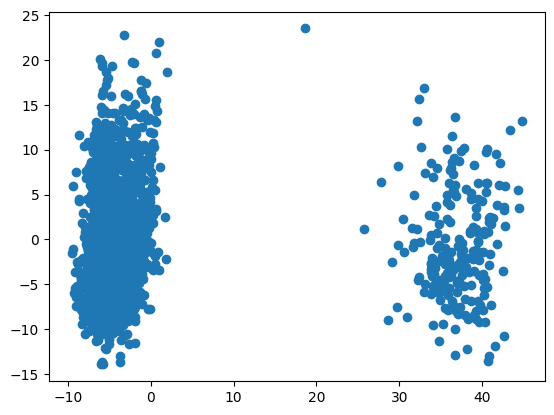

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

<ipython-input-46-9bde0b2dbb57>:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


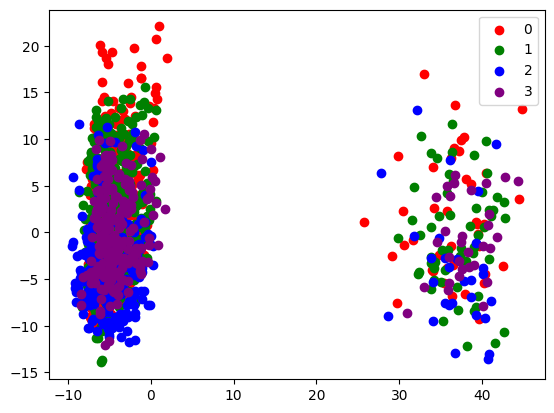

In [ ]:

from matplotlib.colors import ListedColormap
X_set,y_set=np.concatenate([X_train]),np.concatenate([y_train])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [1 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 0]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [2 0]
 [0 0]
 [0 3]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [0 2]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [1 3]
 [1 1]
 [0 0]
 [0 0]
 [0 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [1 3]
 [2 2]
 [1 1]
 [0 3]
 [3 3]
 [1 1]
 [2 2]
 [1 2]
 [2 0]
 [0 2]
 [1 1]
 [1 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120   3   3   1]
 [  6 152   3   2]
 [  4  10  79   0]
 [  2   7   0  76]]


0.9123931623931624

## Visualising the Training set results

<ipython-input-17-4b2069cf5323>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,2], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


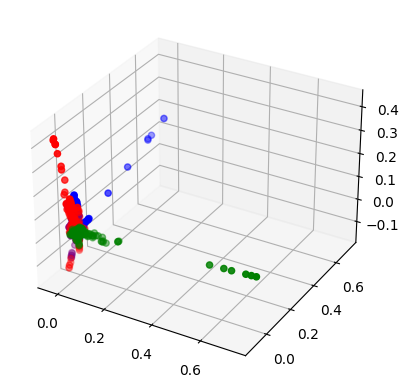

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X_set,y_set=X_train,y_train
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,2], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.show()

KeyError: 'Diagnosis'

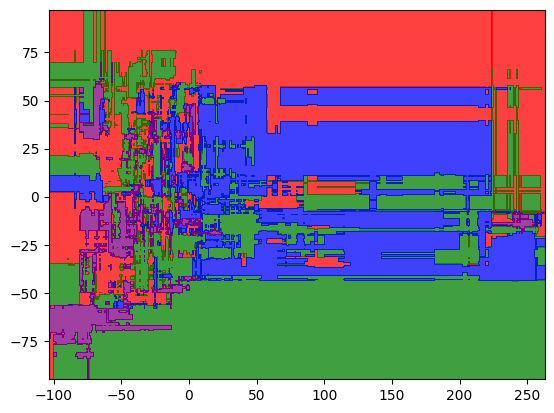

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.1),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(dataset["Diagnosis"].values)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

## Visualising the Test set results

KeyError: 'Diagnosis'

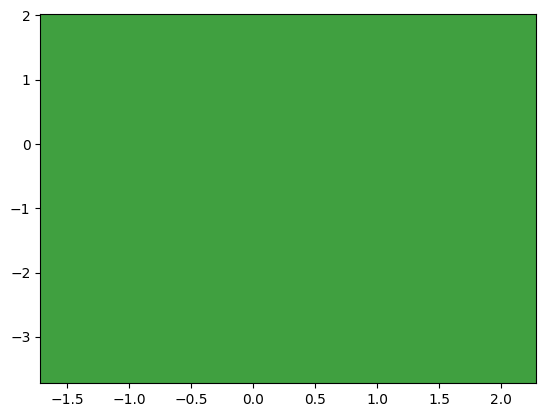

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(dataset["Diagnosis"].values)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ="rbf"  )
classifier.fit(X_train, y_train)

SVC()

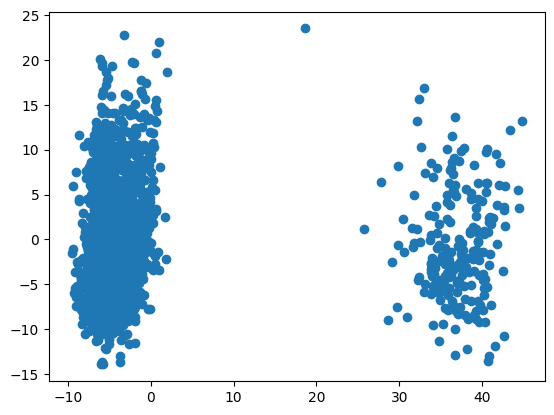

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[122   3   2   0]
 [  0 157   4   2]
 [  0   1  92   0]
 [  0   0   0  85]]


0.9743589743589743

<ipython-input-25-7c1d3f734055>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])


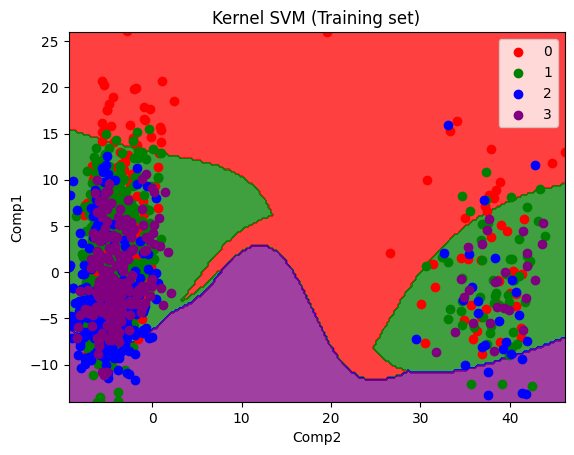

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(newlabels)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Kernel SVM (Training set)')
plt.xlabel('Comp2')
plt.ylabel('Comp1')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())
labs=np.unique(newlabels)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('SVM (Test set)')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()
plt.show()

ValueError: X has 2 features, but SVC is expecting 40 features as input.

#Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Training XGBoost on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[123   2   2   0]
 [  3 151   4   5]
 [  1   2  90   0]
 [  2   0   0  83]]


0.9551282051282052

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 13)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.09 %
Standard Deviation: 2.31 %


# Nueva sección

In [ ]:
# evaluate lda with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=2)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.620 (0.032)


#SVD

In [ ]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=200)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.655 (0.030)


In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [('pca', PCA(n_components=40)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.516 (0.033)


In [ ]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.515 (0.030)


In [ ]:
# evaluate modified lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline
steps = [('ltsa', LocallyLinearEmbedding(n_components=2, method='modified', n_neighbors=10)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.365 (0.020)
